## Observations and Insights 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
msdata=pd.merge(left=mouse_metadata, right=study_results,left_on='Mouse ID',right_on='Mouse ID')
# Display the data table for preview
msdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
miceNum = pd.unique(msdata['Mouse ID'].values)
print(len(miceNum))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = msdata.loc[msdata.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
msdataClean = msdata[msdata['Mouse ID'].isin(dup_mouse_id)==False]
msdataClean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the clean DataFrame.
miceNumC = pd.unique(msdataClean['Mouse ID'].values)
print(len(miceNumC))

248


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen=msdataClean.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimenAvg=regimen[["Tumor Volume (mm3)"]].mean()
regimenMed=regimen[["Tumor Volume (mm3)"]].median()
regimenvar=regimen[["Tumor Volume (mm3)"]].var()
regimenStd=regimen[["Tumor Volume (mm3)"]].std()
regimenSem=regimen[["Tumor Volume (mm3)"]].sem()
# Assemble the resulting series into a single summary dataframe.
regimenAvg["Median"]=regimenMed
regimenAvg["Variance"]=regimenvar
regimenAvg["Std"]=regimenStd
regimenAvg["SEM"]=regimenSem
#rename mean
regimenAvg.rename(columns = {'Tumor Volume (mm3)':'Mean'}, inplace = True)
regimenAvg

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimenmean=regimen[["Tumor Volume (mm3)"]].mean()
mergedDF=regimenmean.merge(regimenMed,on='Drug Regimen').merge(regimenvar,on='Drug Regimen').merge(regimenStd,on='Drug Regimen').merge(regimenSem,on='Drug Regimen')
mergedDF

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

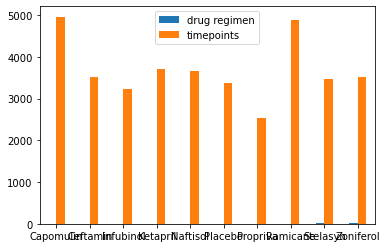

In [7]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
x_axis = np.arange(len(regimen))
y_axis=regimen[["Timepoint"]].sum()
index=["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo",
                            "Propriva","Ramicane","Stelasyn","Zoniferol"]
df = pd.DataFrame({'drug regimen':x_axis, 'timepoints':y_axis['Timepoint']},index=index)
ax = df.plot.bar(rot=0)
 


In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


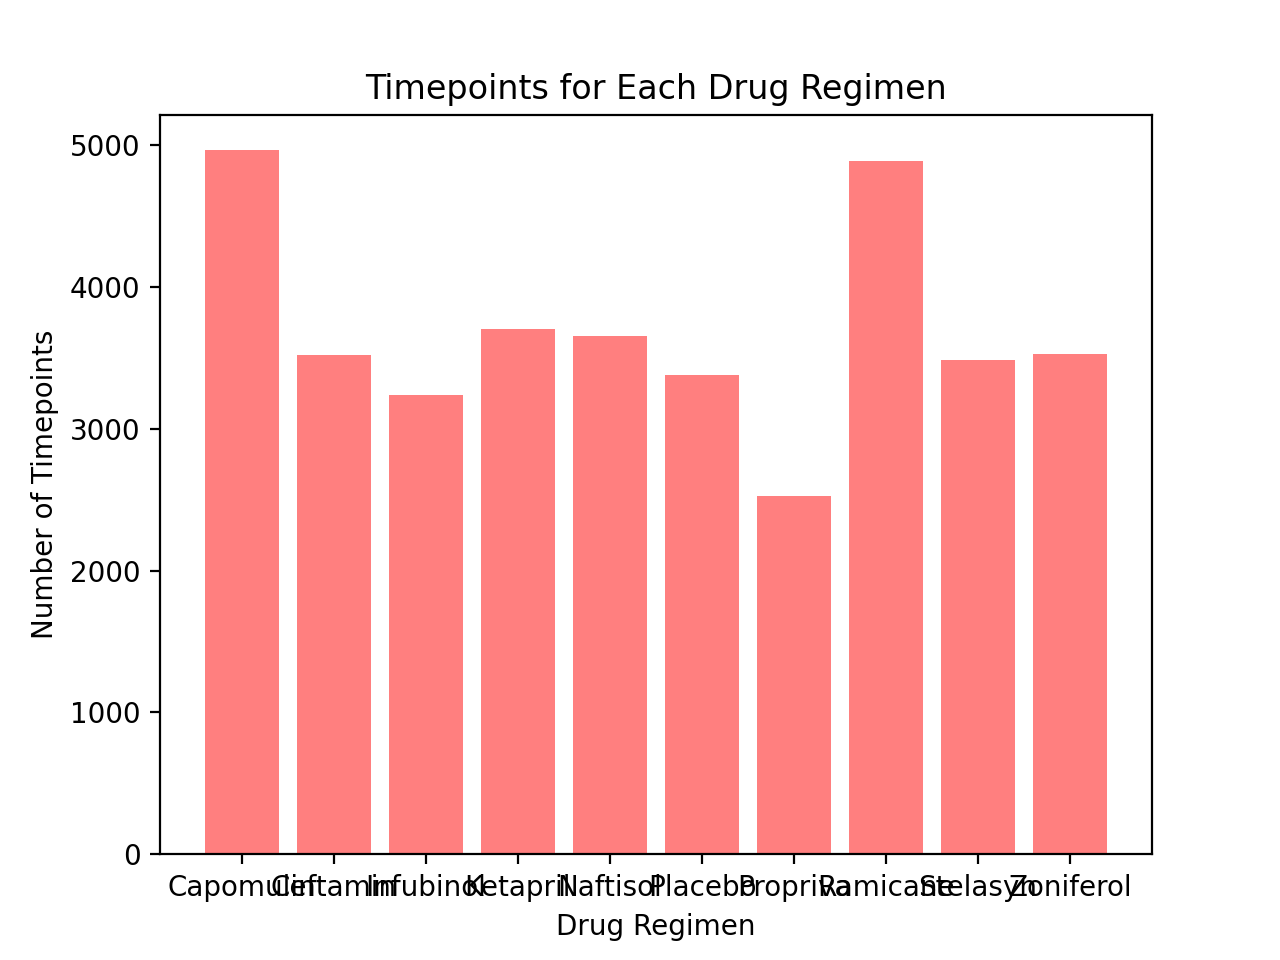

In [17]:
%matplotlib notebook
x_axis = np.arange(len(regimen))
y_axis=regimen[["Timepoint"]].sum()
plt.bar(x_axis, y_axis['Timepoint'], color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo",
                            "Propriva","Ramicane","Stelasyn","Zoniferol"])
plt.title("Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.savefig("../Images/barConfig.png")
plt.show()

<IPython.core.display.Javascript object>


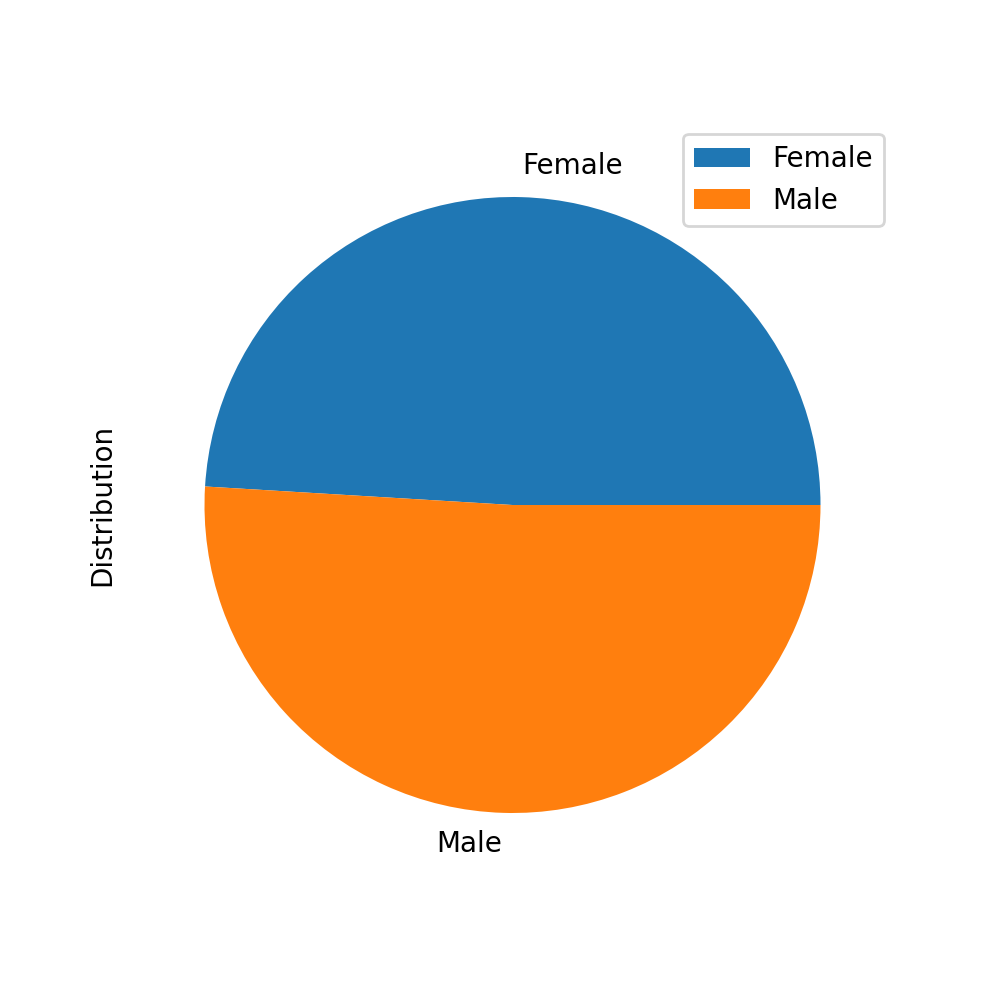

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
%matplotlib notebook
piePlotPd = pd.DataFrame({'Sex': ['Female','Male'],
                   'Distribution': [922,958]},
                  index=['Female','Male'])
plot = piePlotPd.plot.pie(y='Distribution', figsize=(5, 5))

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
sexValueCounts=msdataClean['Sex'].value_counts()

<IPython.core.display.Javascript object>


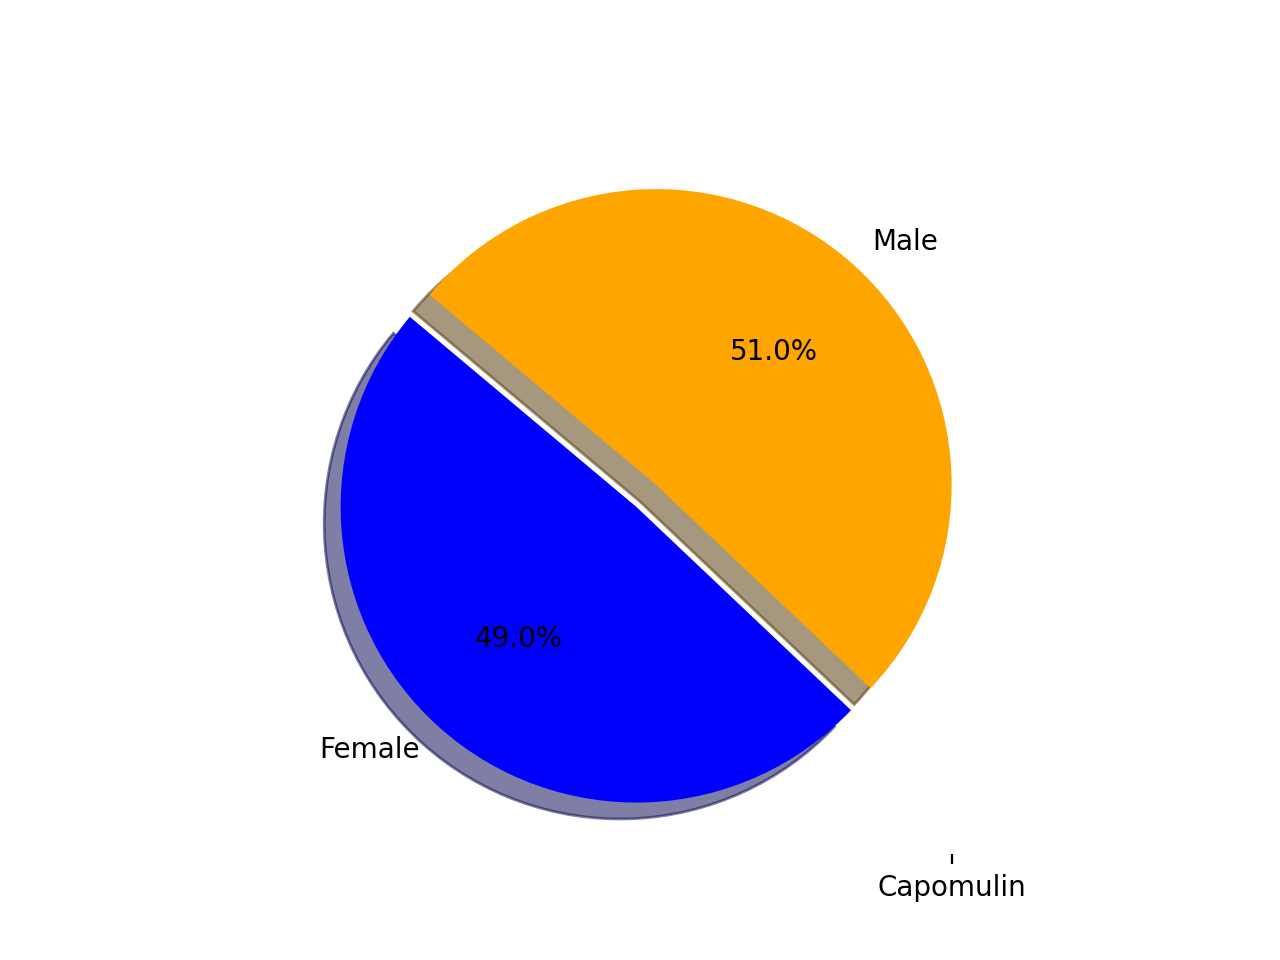

In [20]:

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
pievalues = ['922','958']

# The colors of each section of the pie chart
colors = ["blue", "orange"]

explode = (0.1, 0)

plt.pie(pievalues, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("../Images/pieConfig.png")
plt.show()

## Quartiles, Outliers and Boxplots

<IPython.core.display.Javascript object>


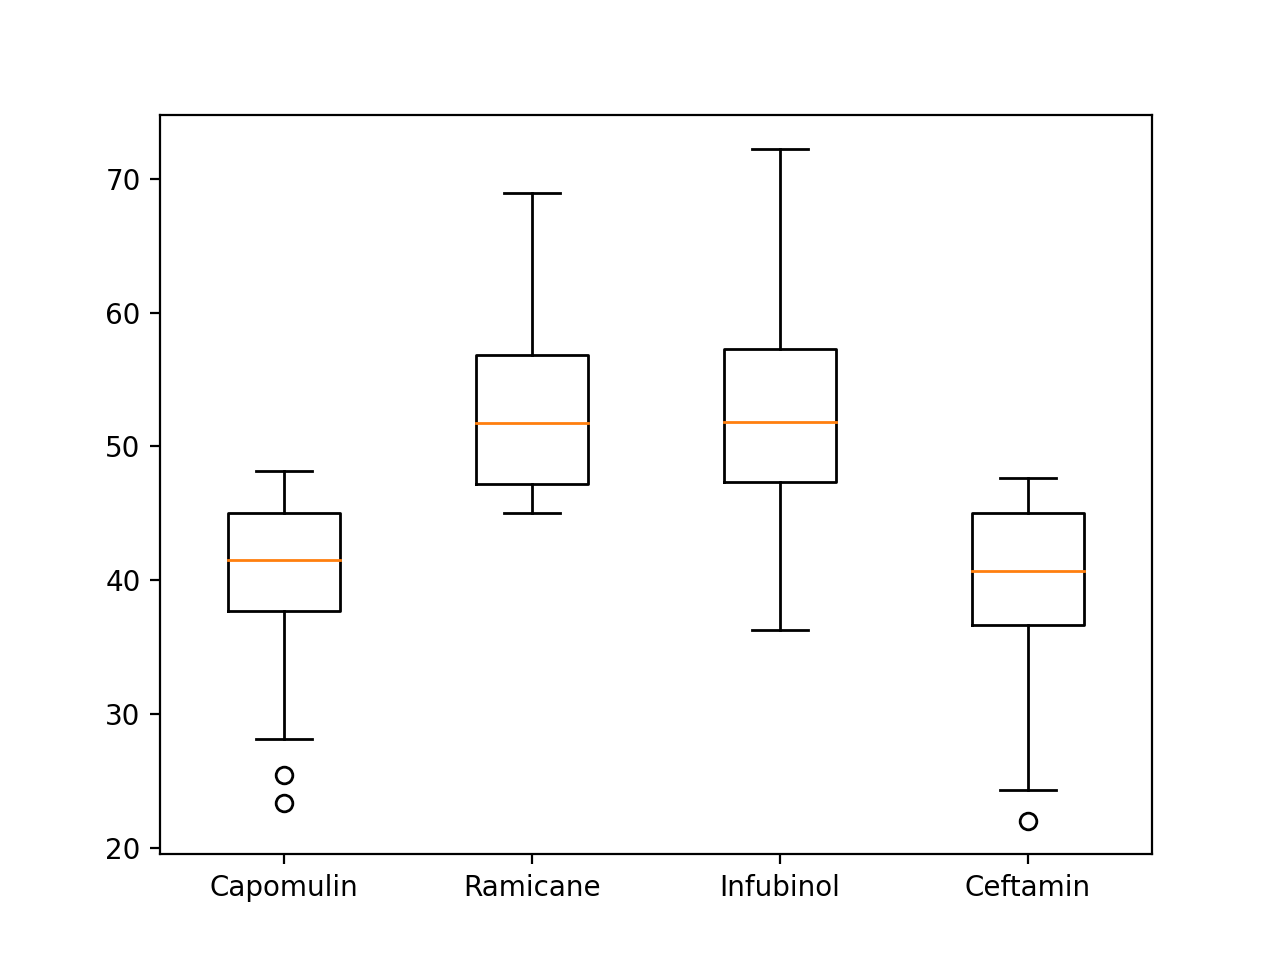

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
%matplotlib notebook
regimens_four=msdataClean[msdataClean['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])]
regimens_four=regimens_four.sort_values(['Timepoint'],ascending=True)
regimensDF=regimens_four[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
CRIC_drug=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
regimen_lists=regimensDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
regimen_lists_df=pd.DataFrame(regimen_lists)
tumorVol=[v for v in regimen_lists_df['Tumor Volume (mm3)']]
plt.boxplot(tumorVol,labels = CRIC_drug)
plt.savefig("../Images/boxplotConfig.png")
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


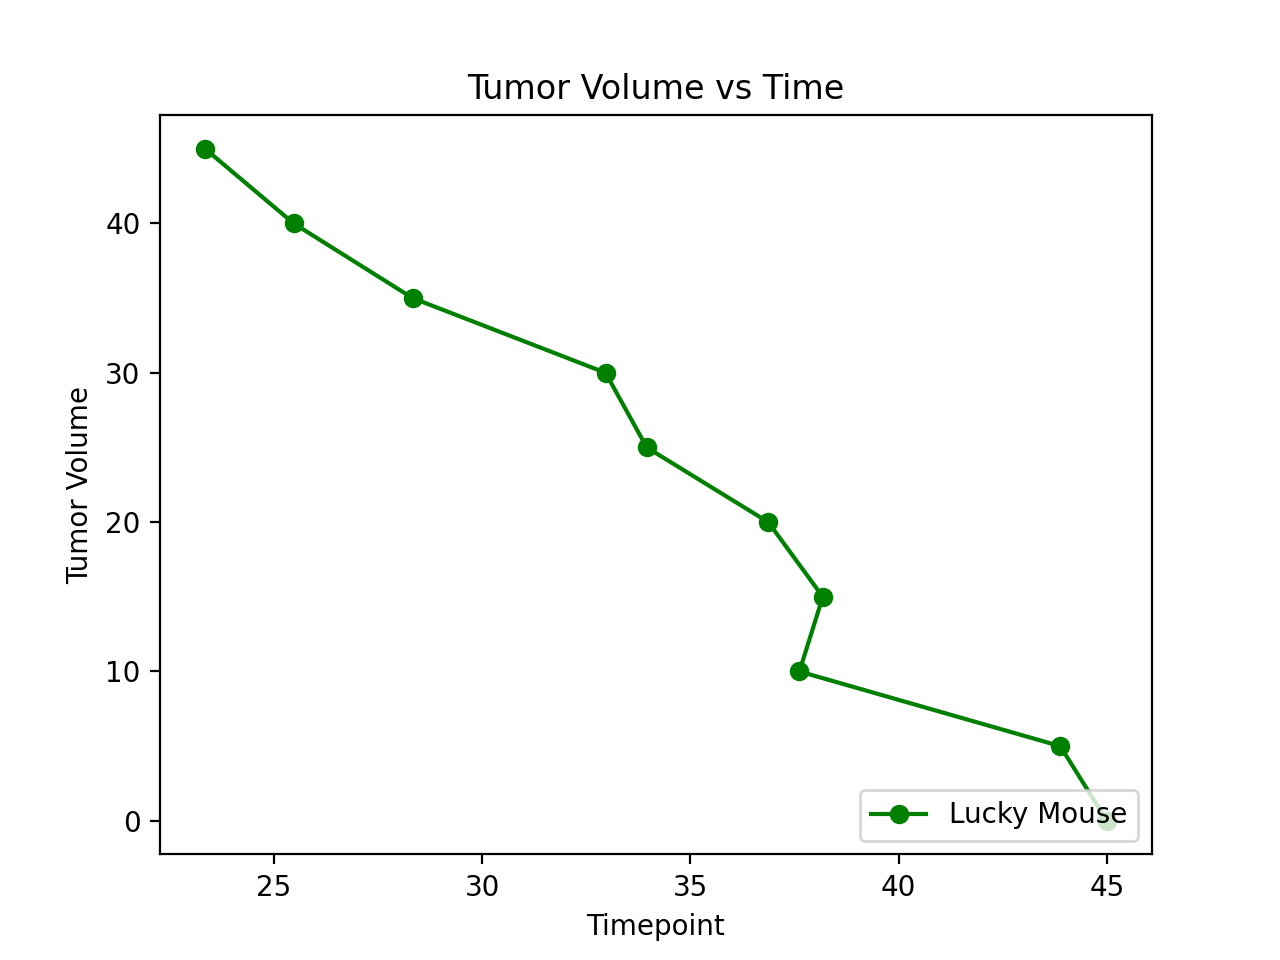

Text(46.972222222222214, 0.5, 'Tumor Volume')

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
regimens_capo=msdataClean[msdataClean['Drug Regimen'].isin(["Capomulin"])]
#choose my lucky mouse
luckyMouse=msdataClean[msdataClean['Mouse ID'].isin(["s185"])]
#graph
%matplotlib notebook
LMtumorVol=luckyMouse['Tumor Volume (mm3)']
LMweight=luckyMouse['Timepoint']
linePlot, = plt.plot( LMtumorVol,LMweight, marker ='o', color='green', label="Lucky Mouse")
plt.legend(loc="lower right")
plt.savefig("../Images/lineConfig.png")
plt.show()
plt.title("Tumor Volume vs Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

<IPython.core.display.Javascript object>


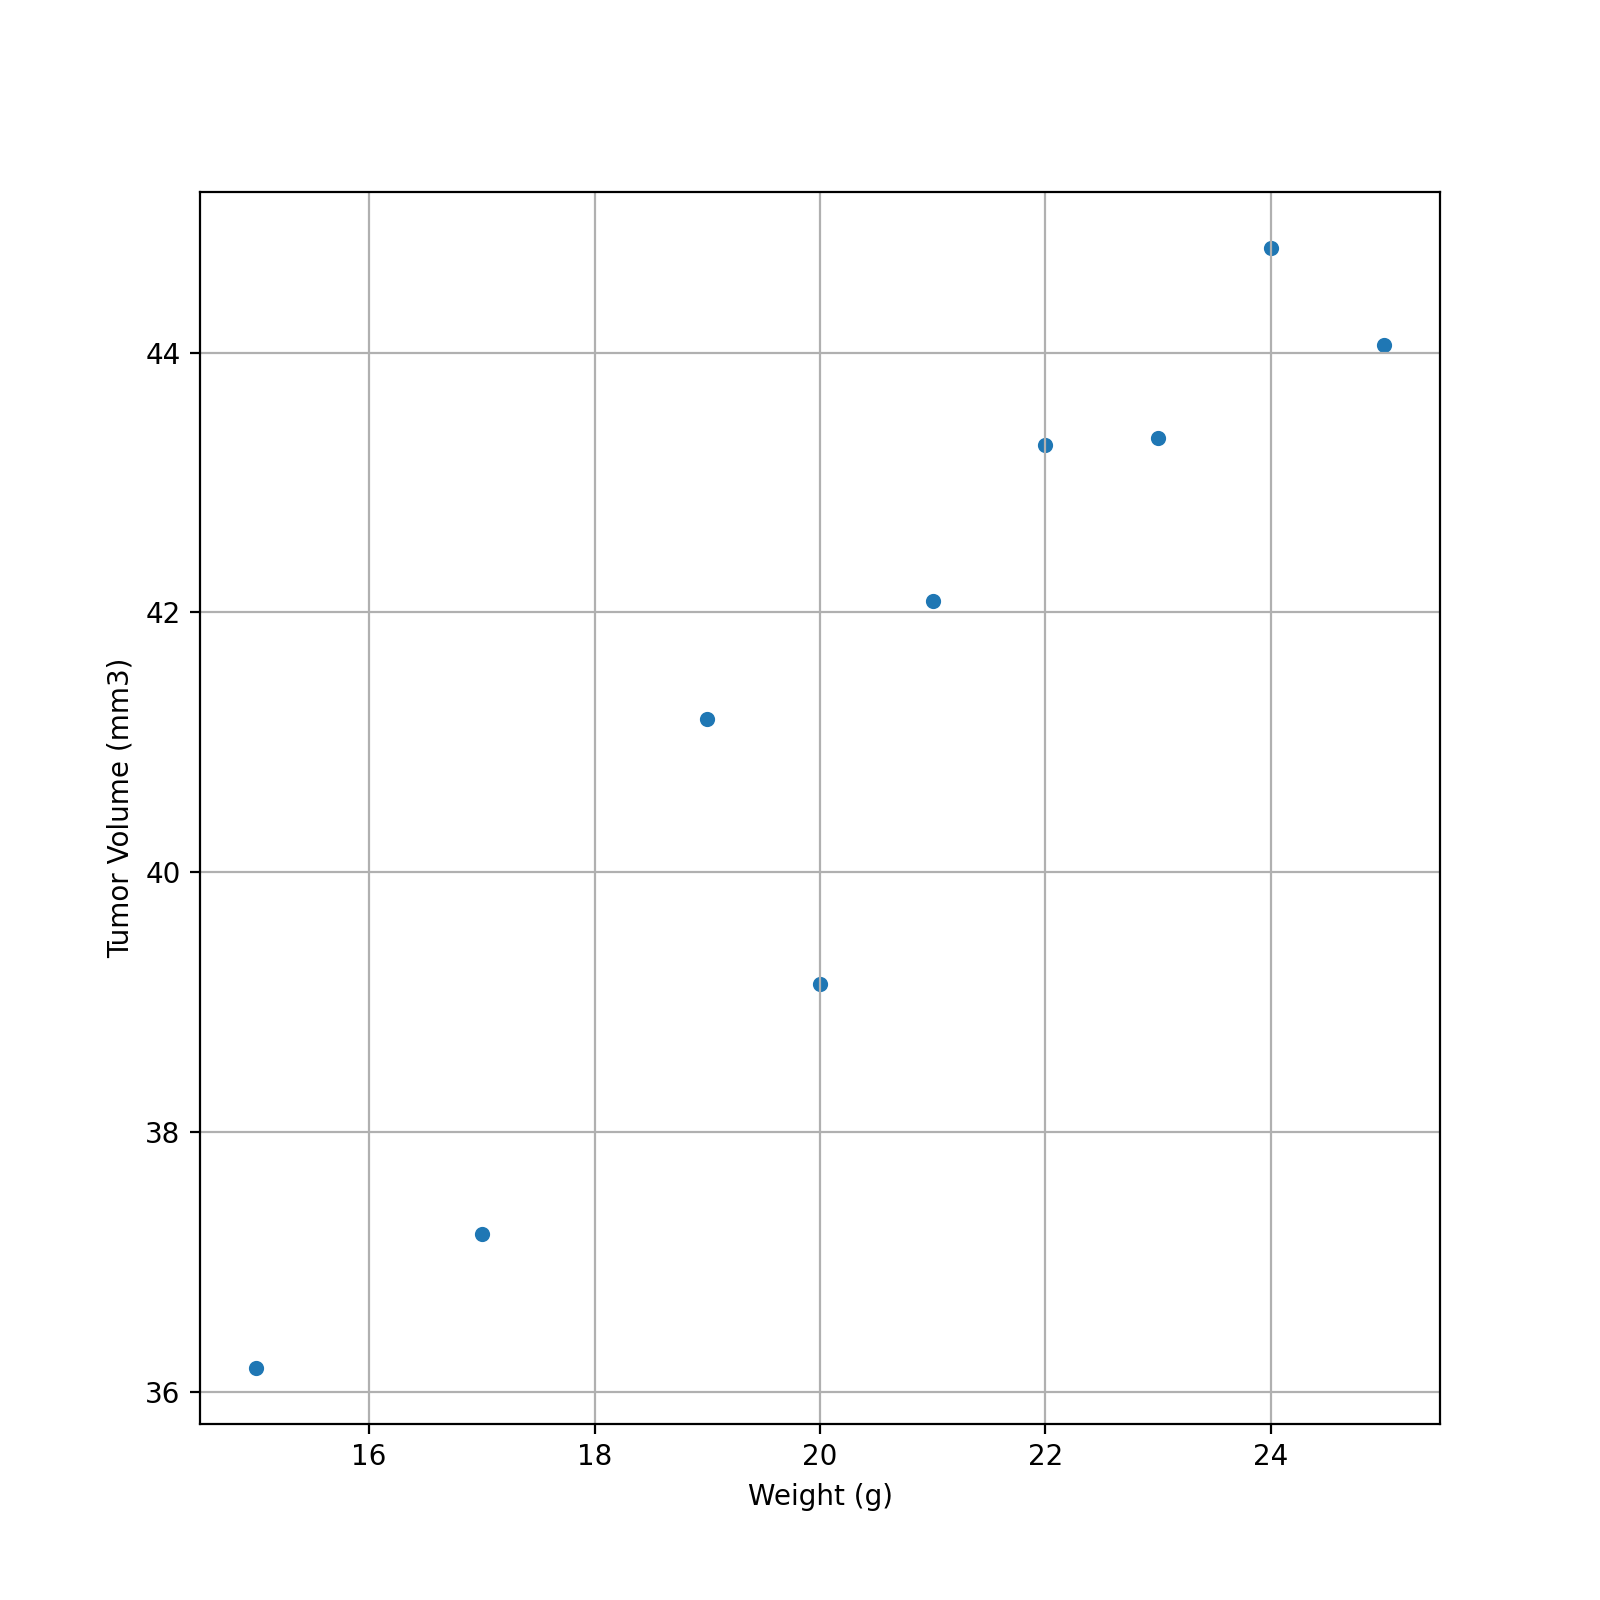

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib notebook
regimens_capo=msdataClean[msdataClean['Drug Regimen'].isin(["Capomulin"])]
capo=regimens_capo[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
weight =regimens_capo.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capoPlot=pd.DataFrame(weight).reset_index()


capomulin_scatter = capoPlot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))


## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capoPlot["Weight (g)"]
y_values = capoPlot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = lineregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()

NameError: name 'lineregress' is not defined

In [41]:
# Print out the r-squared value along with the plot.
x_values = capoPlot["Weight (g)"]
y_values = capoPlot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'linregress' is not defined